# 01. First-Order Equations

In [2]:
import numpy as np
import scipy
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import IPython
import sklearn
import nltk

from IPython.display import Image
%matplotlib inline

import datetime
dt = datetime.datetime.now()

print(
'''{}-{}-{} {}:{}:{}
----------------------
numpy\t\t{}
scipy\t\t{}
pandas\t\t{}
matplotlib\t{}
----------------------
ipython\t\t{}
----------------------
sklearn\t\t{}
nltk\t\t{}'''.format(
    dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second, 
    np.__version__, 
    scipy.__version__, 
    pd.__version__, 
    matplotlib.__version__, 
    IPython.__version__, 
    sklearn.__version__, 
    nltk.__version__))

2019-5-6 18:58:22
----------------------
numpy		1.15.2
scipy		1.1.0
pandas		0.24.1
matplotlib	3.0.0
----------------------
ipython		7.2.0
----------------------
sklearn		0.20.0
nltk		3.2.5


In [3]:
c = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

## 01.01. The Simplest Example

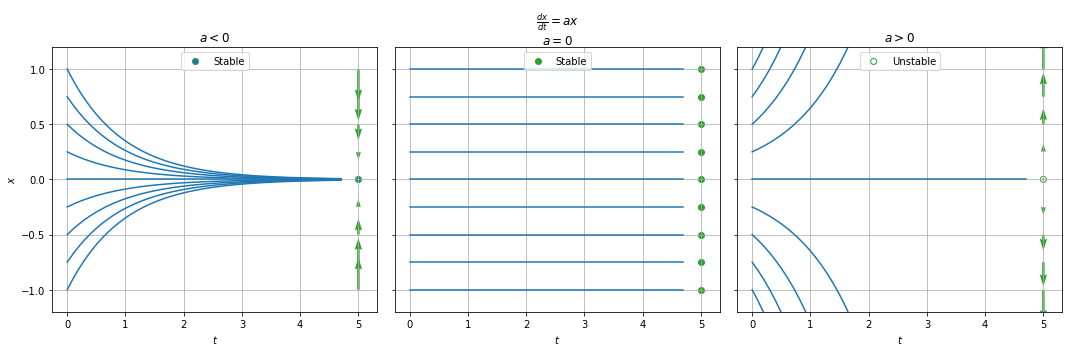

In [35]:
def dx_dt(x, a):
    return x * a

def x(x, a, k):
    return k * np.e ** (a * t)

def flow(x0, t0, iteration, dt):
    xs = np.array([x0])
    ts = np.array([t0])
    
    for i in range(iteration):
        xi = xs[i]
        ti = ts[i]
        xs = np.append(xs, xi + dx_dt(xi, a)*dt)
        ts = np.append(ts, ti + dt)
    return xs, ts

k, t = 1, 1
aa = np.array([-1, 0, 1])

fig, axs = plt.subplots(figsize=(15, 5), ncols=3, nrows=1, sharex=True, sharey=True)

# ax.plot()
X, T = np.meshgrid(np.linspace(-1.0, 1.0, 10), np.linspace(0.0, 2.0, 10))
x = np.linspace(-1.0, 1.0, 9)
x0s = x#np.linspace(-.75, .75, 10)

for ax, a in zip(axs, aa):
#     ax.quiver(T, X, np.repeat(t, len(X)*len(T)), dx_dt(X, a), alpha=1, color=c[2])
    for x0 in x0s:
        xs, ts = flow(x0, 0, 47, .1)
        ax.plot(ts, xs, color=c[0])
    ax.quiver(np.repeat(5, len(x)), x, np.repeat(0, len(x)), dx_dt(x, a), color=c[2])
    ax.grid(True)
    ax.set_xlabel(r'$t$')
    if a > 0:
        ax.set_title('\n' r'$a > 0$')
        ax.scatter(5, 0, marker='o', facecolor='none', edgecolor=c[2], label='Unstable')
    elif a < 0:
        ax.set_title('\n' r'$a < 0$')
        ax.scatter(5, 0, marker='o', facecolor=c[0], edgecolor=c[2], label='Stable')
    elif a == 0:
        ax.set_title(r'$\frac{dx}{dt} = ax$' '\n' r'$a = 0$')
        ax.scatter(np.repeat(5, len(x)), x, color=c[2], label='Stable')
    
#     ax.set_xlim(0, 2.1)
    ax.set_ylim(-1.2, 1.2)
    ax.legend(loc='upper center')

axs[0].set_ylabel(r'$x$')
# axs[1].set_title()


plt.tight_layout()
plt.savefig('fig/fig0101.png')
plt.show()

## 01.02. The Logistic Population Model

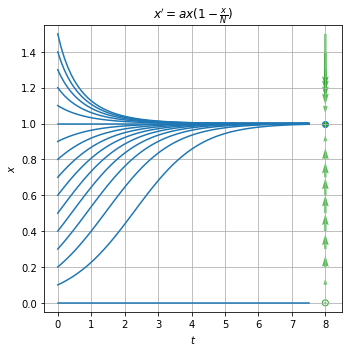

In [32]:
def logistic(x, a):
    return a * x * (1 - x)

def flow(x0, t0, iteration, dt):
    xs = np.array([x0])
    ts = np.array([t0])
    
    for i in range(iteration):
        xi = xs[i]
        ti = ts[i]
        xs = np.append(xs, xi + dx_dt(xi, a)*dt)
        ts = np.append(ts, ti + dt)
    return xs, ts

a, t = 1, 1

X, T = np.meshgrid(np.arange(0.0, 1.5, 0.1), np.arange(0.0, 1.5, 0.1))
x0s = np.linspace(0.0, 1.5, 16)

fig, ax = plt.subplots(figsize=(5, 5))

for x0 in x0s:
    xs, ts = flow(x0, 0, 75, .1)
    ax.plot(ts, xs, c=c[0])

# ax.quiver(T, X, np.repeat(1, len(T)*len(X)), dx_dt(X, a), color=c[2])
ax.grid(True)
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$x$')
ax.set_title(r"$x' = ax (1 - \frac{x}{N})$")
ax.set_ylim(-.05, 1.55)

ax.quiver(np.repeat(8, len(x0s)), x0s, np.repeat(0, len(x0s)), logistic(x0s, a), color=c[2], alpha=.75)
ax.scatter(8, 0, marker='o', label='', edgecolor=c[2], facecolor='none')
ax.scatter(8, 1, marker='o', edgecolor=c[0], facecolor=c[2])


plt.tight_layout()
plt.savefig('fig/fig0103.png')
plt.show()

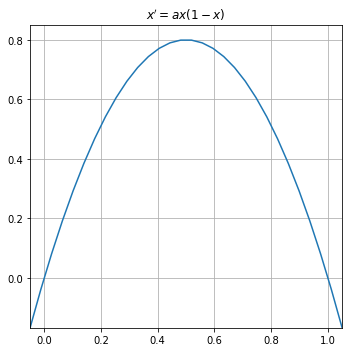

In [14]:
def logistic(x, a):
    return a * x * (1 - x)

a = 3.2
x = np.linspace(-0.05, 1.05, 30)

fig, ax = plt.subplots(figsize=(5, 5))

ax.plot(x, logistic(x,a))

ax.set_title(r"$x' = ax(1 - x)$")
ax.grid(True)
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(logistic(-0.05, a), logistic(0.5, a)+.05)

plt.tight_layout()
plt.show()

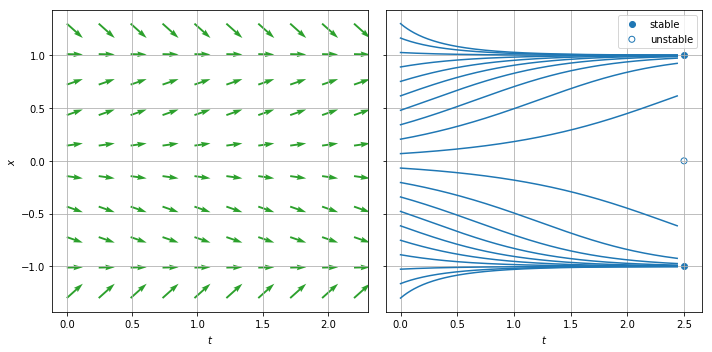

In [79]:
def dx_dt(x):
    return x - x**3

def dt(t):
    return 1


def stream(x0, t0, iteration, delta):
    xs = np.array([x0])
    #ys = np.array([y0])
    ts = np.array([t0])
    for i in range(iteration):
        xi = xs[i] + dx_dt(xs[i]) * delta
        xs = np.append(xs, xi)
        #yi = ys[i] + dy_dt(ys[i]) * delta
        #ys = np.append(ys, yi)
        ti = ts[i] + delta
        ts = np.append(ts, ti)
    return xs, ts

X, T = np.meshgrid(np.linspace(-1.3, 1.3, 10), np.linspace(0, 2.2, 10))

x0s = np.linspace(-1.3, 1.3, 20)

fig, ax = plt.subplots(figsize=(10, 5), ncols=2, sharey=True)

ax[0].quiver(T, X, dt(T), dx_dt(X), color=c[2])

for x0 in x0s:
    xs, ts = stream(x0, 0, 244, .01)
    ax[1].plot(ts, xs, color=c[0])#, alpha=.75)

ax[1].scatter(2.5, -1, facecolor=c[0], edgecolor=c[0], label='stable')
ax[1].scatter(2.5, 0, facecolor='none', edgecolor=c[0], label='unstable')
ax[1].scatter(2.5, 1, facecolor=c[0], edgecolor=c[0])#, label='stable')

# ax.streamplot(T, X, dt(T), dx_dt(X))#, 
#               density=2, 
#               color=np.sqrt(np.repeat(1, len(T)*len(X))**2+dx_dt(X)**2), 
#               cmap='YlGnBu')

ax[0].grid(True)
ax[0].set_xlabel(r'$t$')
ax[0].set_ylabel(r'$x$')
ax[1].grid(True)
ax[1].legend(loc='best')
ax[1].set_xlabel(r'$t$')

plt.tight_layout()
plt.savefig('fig/fig0105.png')
plt.show()